# Section One: Documentation

### Defining the data analytic question:

> Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### Specifying the data analytic question

> Which patient is most likely to have hypothyroid from the given data

### Defining the metrics of success

> The successful model should have an accuracy score of above 70% or an RMSE below 10%.

### Understanding the context

> Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.our thyroid is a small, butterfly-shaped gland situated at the base of the front of your neck, just below your Adam's apple. Hormones produced by the thyroid gland — triiodothyronine (T3) and thyroxine (T4) — have an enormous impact on your health, affecting all aspects of your metabolism. These hormones also influence the control of vital functions, such as body temperature and heart rate.

> Hypothyroidism may be due to a number of factors, including:
- autoimmune disease,
- Over-response to hyperthyroidism treatment
- Thyroid surgery
- Radiation therapy 
- Medications such as lithium 
- Congenital disease
- Pituitary disorder (failure of the pituitary gland to produce enough thyroid-stimulating hormone (TSH) usually because of a benign tumor of the pituitary gland.
- Pregnancy
- Iodine deficiency

> Although anyone can develop hypothyroidism, you're at an increased risk if you:

* Are a woman
* Are older than 60
* Have a family history of thyroid disease
* Have an autoimmune disease, such as type 1 diabetes or celiac disease
* Have been treated with radioactive iodine or anti-thyroid medications
* Received radiation to your neck or upper chest
* Have had thyroid surgery (partial thyroidectomy)
* Have been pregnant or delivered a baby within the past six months


### Data Relevance
> Our data is relevant since it contains relevant columns such age, sex, pregnant, on shows if the patients is susceptible. Columns such as on_thyroxine, query_on_thyroxine, on_antithyroid_medication, thyroid_surgery, query_hypothyroid, query_hyperthyroid are some medication that can trigger the hypothoriod condition. The columns that are physical factors that may lead to  hypothoriod  i.e pregnancy, sick, tumor, lithium and goitre. TSH, TSU, T3, TT4, FTI and TBG levels are biological indicators of hypothoriod. 

> The columns provided are relevant in gaining insights to the data analytical question and classification on hypothoriodism

# Section Two: Reading and initial Data Exploration

## Checking the data packaging

In [1]:
#Importing the necessary libraries for analysis
#Importing the pandas library
import pandas as pd
#Import the numpy library
import numpy as np
#Import the matpotlib library
import matplotlib
import matplotlib.pyplot as plt
#Import stats from scipy
from scipy import stats
#import seaborn library
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
#Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
#Importing  random forest from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
print('Libraries Imported')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Libraries Imported


In [2]:
#Loading the dataset using pandas
#Previewing the first five entries
hypo_df = pd.read_csv('hypothyroid.csv')
hypo_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
#Previewing the bottom five entries
hypo_df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
#Displaying the columns on the dataset
hypo_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [5]:
#Displaying the shape of the dataset
s = hypo_df.shape
print('The no. of rows are', s[0], 'and the no. of columns', s[1])

The no. of rows are 3163 and the no. of columns 26


In [6]:
#Displaying the infomation of the dataset
hypo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# Section Three: Data Cleaning

## Validity

In [7]:
hypo_df['TBG'].unique()

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

## Completeness

In [8]:
#Checking for null values
hypo_df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

## Consistency

In [9]:
#Checking for duplicated values
hypo_df.duplicated().any()

True

In [10]:
#Checking the numbers and entries of the duplicated rows
y = hypo_df[hypo_df.duplicated()]
y

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


We will retain the duplicated values since they are important for the predictive analysis

## Uniformity

In [11]:
#checking for data types
hypo_df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

From above dtypes the age, TSH, T3, TT4, T4U, FT1, TBG object will be changed to numeric

In [12]:
#Computing the mode of variables 
#This will help in replace the entries with '?'
#Displaying the ? entries on the dataframe
y = hypo_df[hypo_df['age'] !=  '?']
#Finding the mode of patients age in the dataframe 
y['age'].mode()

#Creating a dataframe where there are no ? entries in the variable T3
y = hypo_df[hypo_df['T3'] != '?']
#Finding the mode of T3 where '?' is not an entry
y['T3'].mode()

#Creating a dataframe where there are no ? entries in the variable TT4
y = hypo_df[hypo_df['TT4'] != '?']
#Finding the mode of TT4 where '?' is not an entry
y.TT4.mode()

#Creating a dataframe where there are no ? entries in the variable T4U
y = hypo_df[hypo_df['T4U'] != '?']
#Finding the mode of T4U where '?' is not an entry
y.T4U.mode()

#Creating a dataframe where there are no ? entries in the variable FTI
y = hypo_df[hypo_df['FTI'] != '?']
#Finding the mode of FTI where '?' is not an entry
y.FTI.mode()

#Creating a dataframe where there are no ? entries in the variable TBG
y = hypo_df[hypo_df['TBG'] != '?']
#Finding the mode of TBG where '?' is not an entry
y.TBG.mode()

#Creating a dataframe where there are no ? entries in the variable sex
y = hypo_df[hypo_df['sex'] != '?']
#Finding the mode of sex where '?' is not an entry
y.sex.mode()

0    F
dtype: object

Most entries with ? did not have their test carried out

In [13]:
#Replace ? in columns with mode of the columns
#Replacing age with modal entries

hypo_df['age'] = hypo_df['age'].replace('?', 60)

#Replacing T3 variables with modal entries
hypo_df['T3'] = hypo_df['T3'].replace('?', 1.6)

#Replacing TT4 variables with modal entries
hypo_df['TT4'] = hypo_df['TT4'].replace('?', 98)

#Replacing T4U variables with modal entries
hypo_df['T4U'] = hypo_df['T4U'].replace('?', 0.98)

#Replacing FTI variables with modal entries
hypo_df['FTI'] =hypo_df['FTI'].replace('?', 98)

#Replacing TBG variable with modal entries
hypo_df['TBG'] = hypo_df['TBG'].replace('?', 28)

#Replacing TSH variable with modal entries
hypo_df['TSH'] = hypo_df['TSH'].replace('?', 0)

#Replacing sex variable with modal entries
hypo_df['sex'] = hypo_df['sex'].replace('?', 'F')



In [14]:
#From above dtypes the age, TSH, T3, TT4, T4U, FT1, TBG object will be changed to numeric
#The boolean columns will be changed to bool data type

#Changing the age column to integers
hypo_df['age'] = hypo_df['age'].astype(int)
#Changing the T3 column to float
hypo_df['T3'] = hypo_df['T3'].astype(float)
#Changing the TT4 column to float
hypo_df['TT4'] = hypo_df['TT4'].astype(float)
#Changinging the T4U column to float
hypo_df['T4U'] = hypo_df['T4U'].astype(float)
#Changing the FTI column to float
hypo_df['FTI'] = hypo_df['FTI'].astype(float)
#Changing the TBG column to float
hypo_df['TBG'] = hypo_df['TBG'].astype(float)
#Changing the TSH column to float
hypo_df['TSH'] = hypo_df['TSH'].astype(float)

#Changing categorical columns
cat_col = ['T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'TSH_measured']
for column in cat_col:
  #hypo_df[column] = hypo_df[column].astype('category')
  hypo_df[column] = hypo_df[column].replace('n', 0)
  hypo_df[column] = hypo_df[column].replace('y', 1)

#Changing boolean columns
bool_col = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 
            'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']
for column in bool_col:
  #hypo_df[column] = hypo_df[column].astype('bool')
  hypo_df[column] = hypo_df[column].replace('t', 1)
  hypo_df[column] = hypo_df[column].replace('f', 0)
#Confirming the changed data types
print(hypo_df.dtypes)

status                        object
age                            int64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
TBG                          float64
dtype: object


In [15]:
# uniformity of entries
# A for loop is used to print out the unique values for each column
#
for column in hypo_df.columns:         # Iterating through each column in the dataframe
  print(column)                        # Printing the column name for better readability
  print(hypo_df[column].nunique())     #Printing the number of unique values in each column
  print(hypo_df[column].unique())      # Printing only unique values in each column
  print('\n')  

status
2
['hypothyroid' 'negative']


age
92
[72 15 24 77 85 64 20 42 69 75 53 59 68 50 78 65 28 43 40 84 60 83 63 73
 36 27 48 71 34 79 62 74 32 41 70 29  5 58 35 51 22 16 44 39 47 18 17 88
 56 30 45 66 52 54 80 33 38 92 67 46 13 89 61 49 26 57 31 90 81 25 37 76
 87 23 55 86 98 21 97  1  6 14 82 11 19  9 12 10  8  7  4 93]


sex
2
['M' 'F']


on_thyroxine
2
[0 1]


query_on_thyroxine
2
[0 1]


on_antithyroid_medication
2
[0 1]


thyroid_surgery
2
[0 1]


query_hypothyroid
2
[0 1]


query_hyperthyroid
2
[0 1]


pregnant
2
[0 1]


sick
2
[0 1]


tumor
2
[0 1]


lithium
2
[0 1]


goitre
2
[0 1]


TSH_measured
2
[1 0]


TSH
239
[3.00e+01 1.45e+02 0.00e+00 4.30e+02 7.30e+00 1.38e+02 7.70e+00 2.10e+01
 9.20e+01 4.80e+01 3.60e+01 1.50e+01 1.53e+01 2.50e+01 6.10e+01 2.80e+01
 1.70e+02 5.40e+01 2.16e+02 5.60e+01 7.10e+01 4.60e+01 7.00e+01 3.40e+01
 5.30e+01 9.40e+00 1.26e+02 1.00e+01 5.30e+02 3.50e+01 6.50e+01 5.70e+01
 1.25e+02 2.30e+01 8.00e+01 1.17e+02 4.90e+01 6.60e+01 8.20e+00 1.50e+02
 1

## Dealing with Outliers

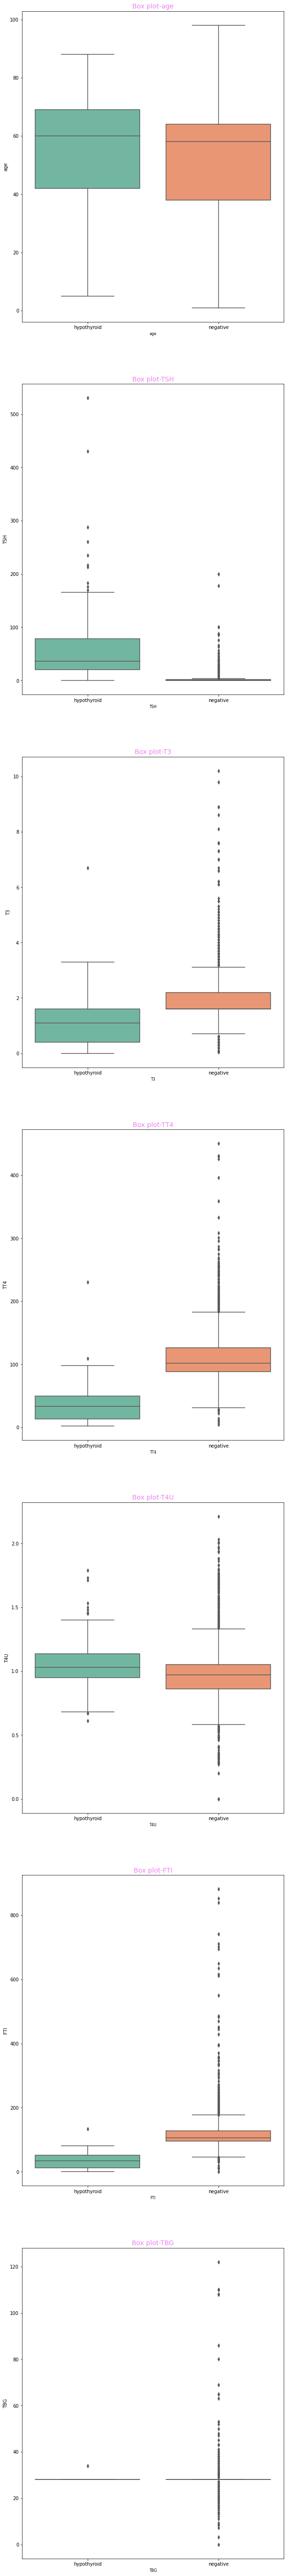

In [16]:
#Checking for outliers in numerical variables
num_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U','FTI', 'TBG']
col_names = num_columns

fig, ax = plt.subplots(len(col_names), figsize = (10, 100))

for i, col_val in enumerate(col_names):

  sns.boxplot(x =hypo_df.status ,y= hypo_df[col_val], ax=ax[i], palette = 'Set2' )
  ax[i].set_title('Box plot-{}'.format(col_val),color = 'violet', fontsize=14)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

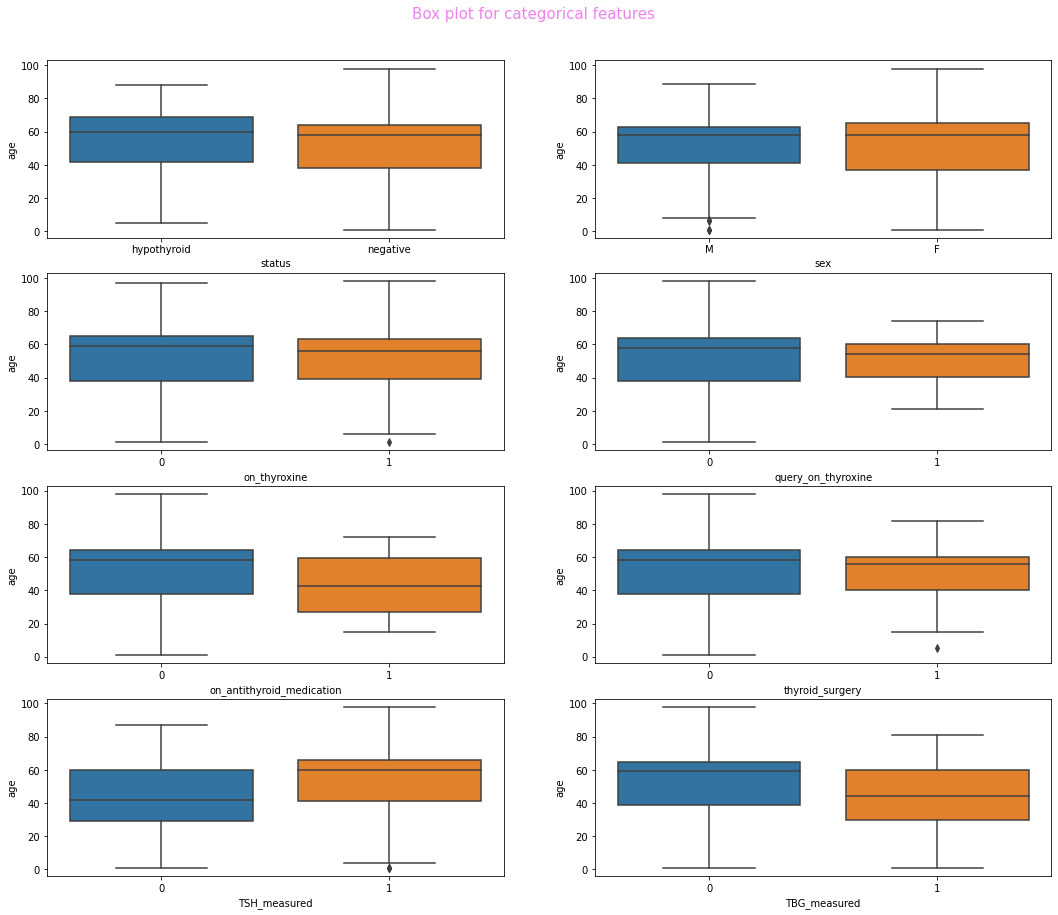

In [17]:
#Checking for outliers in categorical variables
cat_columns = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'TSH_measured', 'TBG_measured']

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (18, 15))
fig.suptitle('Box plot for categorical features', y= 0.93, color = 'violet', fontsize = 15)

for ax, data, name in zip(axes.flatten(), hypo_df, cat_columns):
  sns.boxplot(hypo_df[name], hypo_df.age, ax = ax)

# Univariate Analysis

## Measures of central tendancy

In [18]:
# using a for loop to find the median value of all the numerical columns
for column in num_columns:
  print('\n')
  print(column +':' + str(hypo_df[column].median()))



age:58.0


TSH:0.4


T3:1.6


TT4:100.0


T4U:0.98


FTI:105.0


TBG:28.0


## Measures of spread

In [19]:
#calculating variance, standard deviations, skewness and kurtosis values for our columns of interest

for column in num_columns:
  print('\n')
  print(column + ', variance: ' +str(hypo_df[column].var()))
  print(column + ', std_deviation: ' +str(hypo_df[column].std()))
  print(column + ', skewness: ' +str(hypo_df[column].skew()))
  print(column + ', kurtosis: ' +str(hypo_df[column].kurt()))



age, variance: 329.2454372915162
age, std_deviation: 18.145121583817403
age, skewness: -0.35808478687675016
age, kurtosis: -0.6824148998327639


TSH, variance: 491.0692814155642
TSH, std_deviation: 22.16008306427492
TSH, skewness: 11.04189326628568
TSH, kurtosis: 178.5531388477672


T3, variance: 0.7949720574287293
T3, std_deviation: 0.8916120554527789
T3, skewness: 2.552558434978423
T3, kurtosis: 13.998978989575747


TT4, variance: 1914.5410739230053
TT4, std_deviation: 43.75546907442549
TT4, skewness: 1.6184066783716928
TT4, kurtosis: 7.838546000666537


T4U, variance: 0.04731201327093411
T4U, std_deviation: 0.21751324849519882
T4U, skewness: 0.9528969918716818
T4U, kurtosis: 3.9606268576592374


FTI, variance: 3367.139126068866
FTI, std_deviation: 58.02705512145921
FTI, skewness: 5.334569854668656
FTI, kurtosis: 51.258695280194466


TBG, variance: 31.086413234300103
TBG, std_deviation: 5.57551909998523
TBG, skewness: 11.09980167110484
TBG, kurtosis: 158.59704195888756


## Frequency distribution for numeric variables



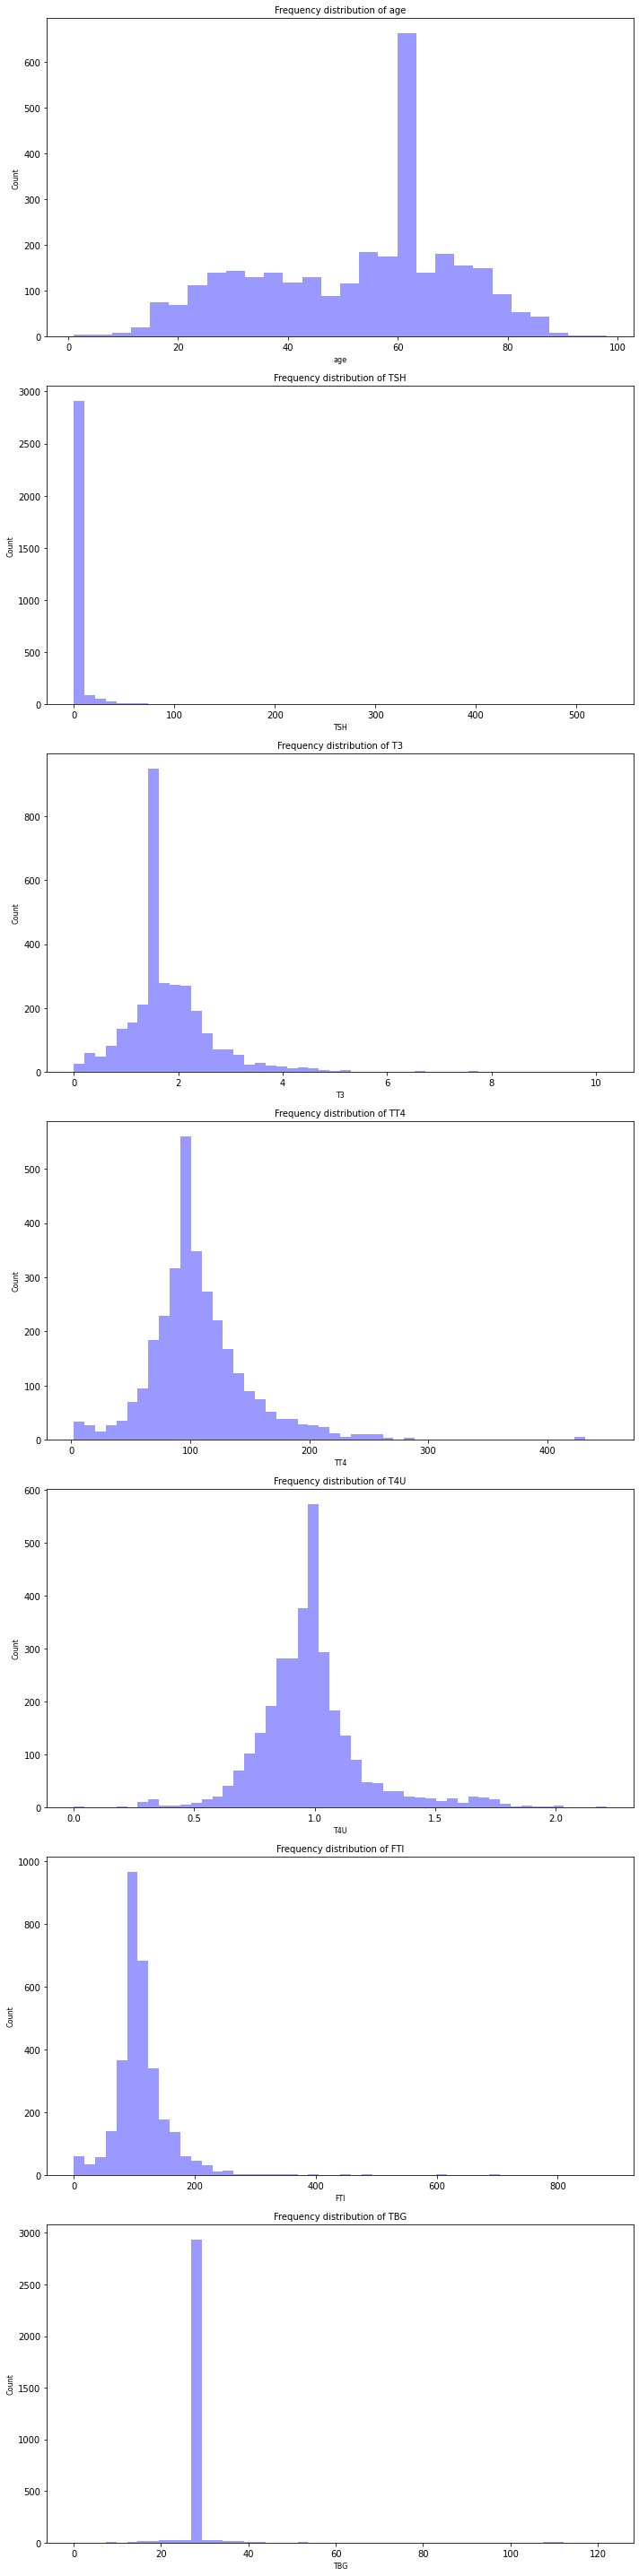

In [20]:
# Plotting distribution of numerical variables
col_names = num_columns
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(hypo_df[col_val], hist=True, ax=ax[i], kde = False, color = 'blue')
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

## Bar Charts for categorical variables


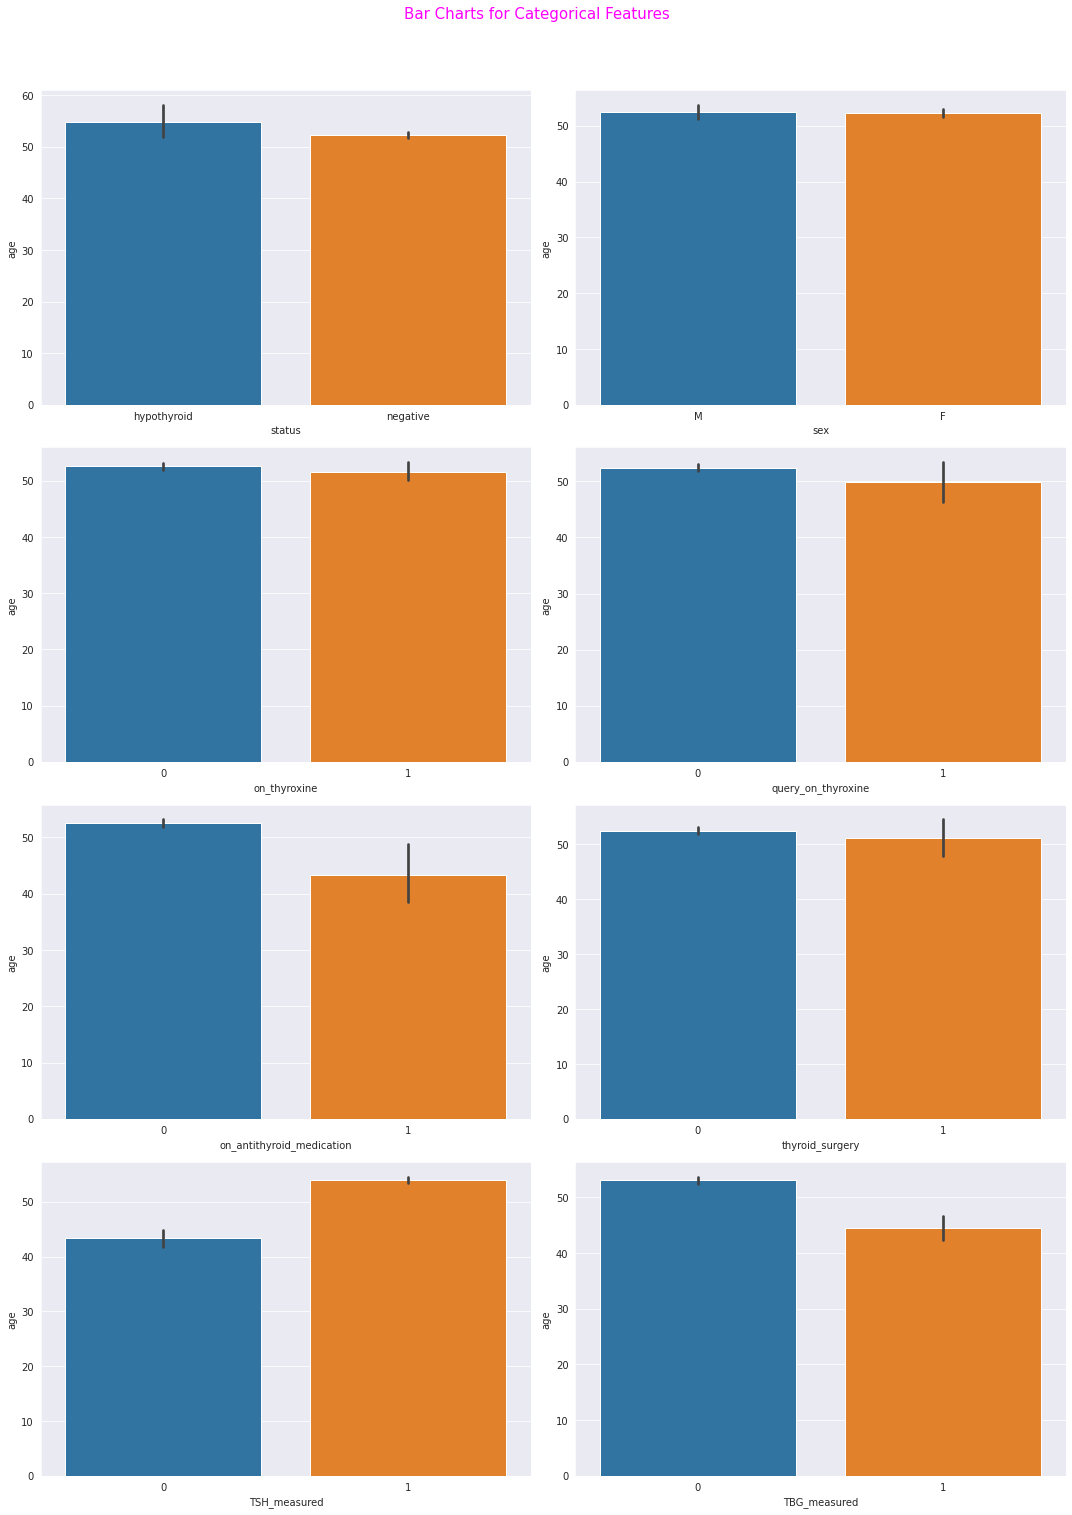

In [21]:
# Bar charts of categorical columns according to the household_size
#
sns.set_style('darkgrid')                                             # Setting the grid style of plots to dark
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 20))     # Ceating four subplots, in two rows and two columns
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Bar Charts for Categorical Features', y = 1.05, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), hypo_df, cat_columns):   # Iterating through the subplots
  sns.barplot(hypo_df[name], hypo_df.age , ax = ax)                   # Creating a barchart in each subplot
  
plt.tight_layout()  # Fitting the subplots to avoid overlapping

### Univariate analysis summaries
> summary of numerical variables:
* The age variable show that there are more people who are 60 years of age in the frequency distribution. It is somehow left-skewed.
* The TSH variable has more entries at 0 and is right skewed.
* The T3 variable has more entries at the 1 mark and is also right-skewed.
* The TT4 variable is almost a normal distribution with most observations at the 100 mark.
* The T4U variable has a normal distribution with most observations at 1 mark.
* The TFI variable has a left-skewed  distribution with most entries at 100 mark.
* The TBG variable has a left-skewed distribution with most entries at 30 mark.

> Summary of categorical variables:
* The status variable has more hypothoroide entries than negative entries.
* The sex variable has more female entries than male entries.
*  On thyroxine variable has more 1 responses which is true as  compared to 0 which is false.
* Query_on_thyroxine variable has more 0 entries which is a false response as compared to 1 which is true.
* On_anti-thyroid_medication variable has more 0 entries which is a false response as compared to 1 which is true.
* Thyroid_surgery variable has more 0 entries which is a false response as compared to 1 which is true.
* TSH measured variable has more 1 responses which is true as  compared to 0 which is false.
* TBG measured variable has more 0 entries which is a false response as compared to 1 which is true.


# Bivariate Analysis

### Heatmap of variables

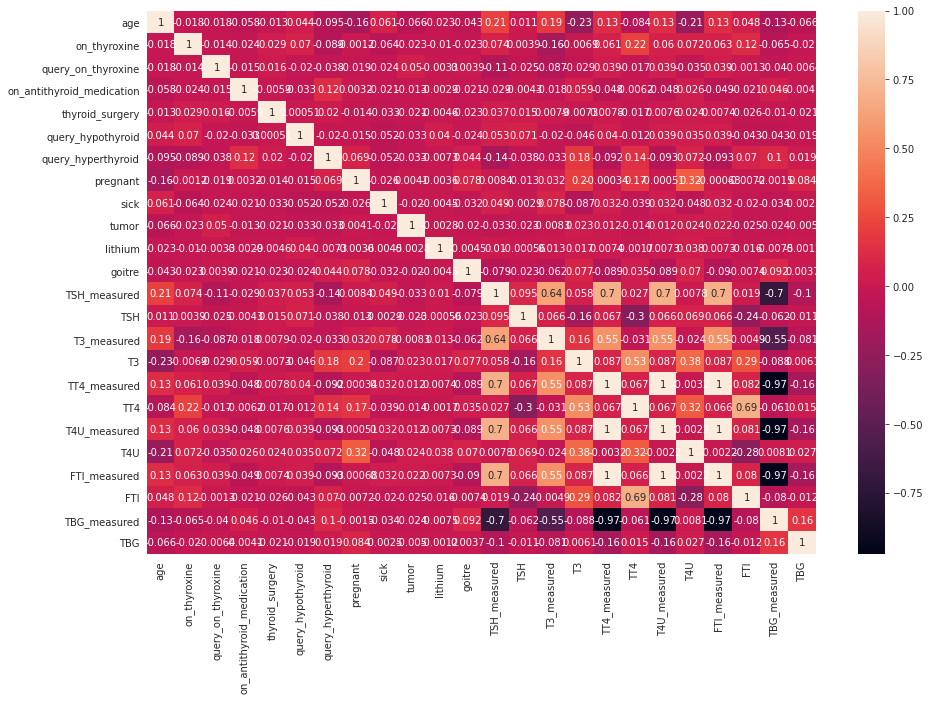

In [22]:
#  checking for correlation using a heatmap

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(hypo_df.corr(), annot=True, ax=ax);

### Pairplots of variables

<Figure size 480x320 with 0 Axes>

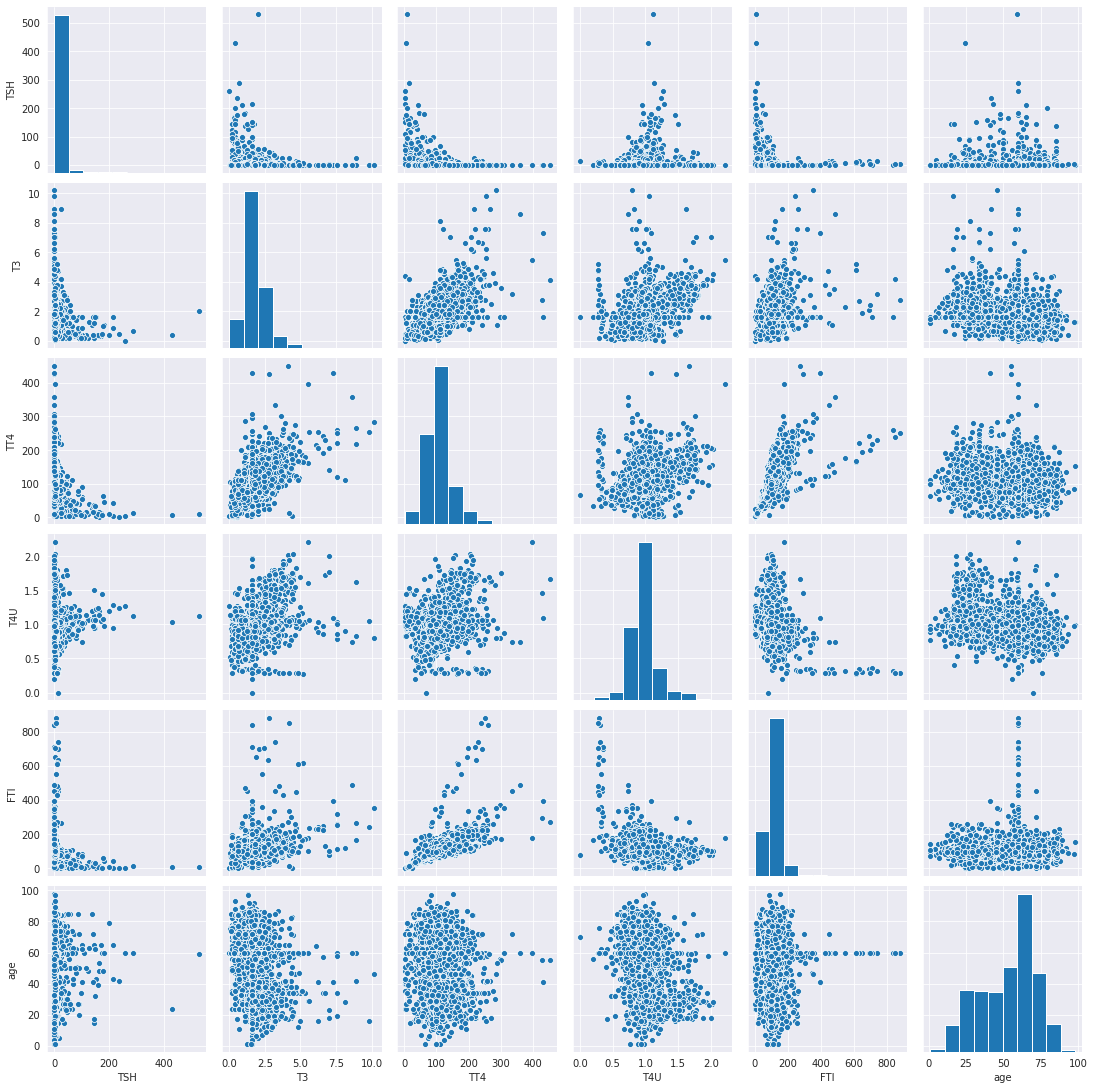

In [23]:
plt.figure(dpi= 80)
sns.pairplot(hypo_df[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'age']], kind="scatter")
plt.show()

### Question one: 
How many sick people have hypothoroid?

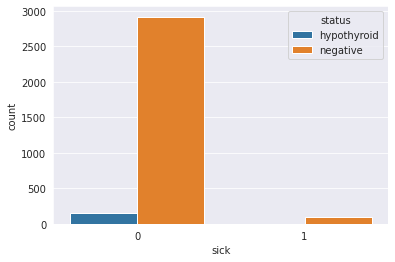

In [24]:
sns.countplot(x='sick',hue='status',data=hypo_df)

# Modelling

In [26]:
#Encoding our data

encode_column = ['status', 'sex']

for column in encode_column:
  hypo_df[column]= pd.get_dummies(hypo_df[column])
hypo_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,28.0
1,1,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,28.0
2,1,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,28.0
3,1,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,28.0
4,1,77,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,28.0


## Baseline Model

Our baseline model will be a binomial logistic regression. This will give an output of either 0 or 1. That is to predict whether the patient has hypothoroid or not.

### Logistic Regression

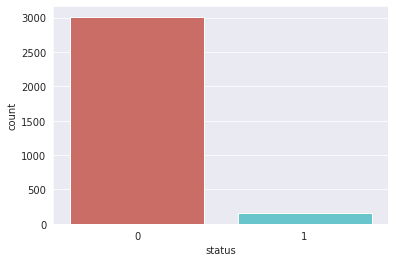

In [27]:
#Displaying the variable status
#This is our dependent variable
sns.countplot(x='status',data=hypo_df, palette='hls')

The status variable has more hypothoriod entries than negative entries.

In [28]:
import sklearn.metrics as metrics
# Splitting our dataset
#
X = hypo_df.drop("status",axis=1)
y = hypo_df["status"]

from sklearn.model_selection import train_test_split
#Training 70% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

#Scaling our data
from sklearn import preprocessing
import numpy as np
X_scaled = preprocessing.scale(X_train)
X_scaled
# Fitting our model

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_scaled, y_train)
# Using our model to make a prediction
y_pred_log = LogReg.predict(X_test)

# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix)
print('\n')

#Checking the errors of our model using the metrics module
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision score:",metrics.precision_score(y_test, y_pred_log))
print("Recall score:",metrics.recall_score(y_test, y_pred_log))
print('\n')

#Creating a dataframe to output predicted values
Prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log})
Prediction_df.describe()


[[901   1]
 [ 36  11]]


Accuracy score: 0.9610115911485775
Precision score: 0.9166666666666666
Recall score: 0.23404255319148937




,Actual,Predicted
count,949.000000,949.000000
mean,0.049526,0.012645
std,0.217078,0.111795
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Logistic regression:

Our model has a classification rate of 96% which good. Our model however seems over-fitted since its almost 100%.

In prediction case, when the Logistic Regression model predicts a hypothoroid patients, the prediction is true have 91% of the time.

The recall, the ability for the model to identify a patient with hypothoroid is 23% of the time 

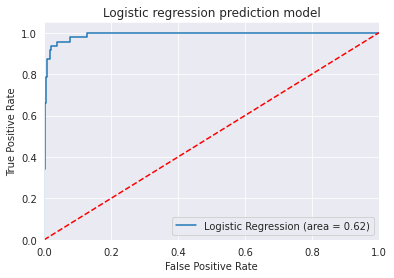

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression prediction model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

AUC score for the case is 0.62. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier. Our model is not a perfect classifier.

### Logistic regression with feature selection

In [30]:
from sklearn.feature_selection import RFE
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
f =fit.ranking_
f
#Creating a dataframe of variables and importance
ft = pd.DataFrame({'feature': X.columns, 'importance': f})
ft

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Num Features: 5
Selected Features: [False False False  True False False False False False  True  True False
 False  True False False False  True False False False False False False
 False]


,feature,importance
0,age,20
1,sex,8
2,on_thyroxine,13
3,query_on_thyroxine,1
4,on_antithyroid_medication,7
5,thyroid_surgery,4
6,query_hypothyroid,5
7,query_hyperthyroid,16
8,pregnant,3
9,sick,1


In [31]:
X = hypo_df[['query_on_thyroxine', 'sick', 'tumor', 'TSH_measured', 'TT4_measured']]
y = hypo_df["status"]

from sklearn.model_selection import train_test_split
#Training 70% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

#Scaling our data
from sklearn import preprocessing
import numpy as np
X_scaled = preprocessing.scale(X_train)
X_scaled
# Fitting our model

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_scaled, y_train)
# Using our model to make a prediction
y_pred_log = LogReg.predict(X_test)

# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix)
print('\n')

#Checking the errors of our model using the metrics module
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision score:",metrics.precision_score(y_test, y_pred_log))
print("Recall score:",metrics.recall_score(y_test, y_pred_log))
print('\n')

#Creating a dataframe to output predicted values
Prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log})
Prediction_df.describe()

[[902   0]
 [ 47   0]]


Accuracy score: 0.9504741833508957
Precision score: 0.0
Recall score: 0.0




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Actual,Predicted
count,949.000000,949.0
mean,0.049526,0.0
std,0.217078,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,0.000000,0.0
max,1.000000,0.0


Logistic regression:

Our model has a classification rate of 95% which good. Our model however seems over-fitted since its almost 100%.

In prediction case, when the Logistic Regression model predicts a hypothoroid patients, the prediction is true have 0% of the time.

The recall, the ability for the model to identify a patient with hypothoroid is 0% of the time

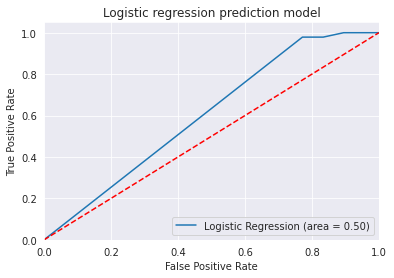

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression prediction model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

AUC score for the case is 0.5. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier. Our model is not a perfect classifier.

## Decision Tree

### Random Forests

In [51]:
hypo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   uint8  
 1   age                        3163 non-null   int64  
 2   sex                        3163 non-null   uint8  
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

In [61]:
#Assigning our target variable
y = hypo_df['status']

#Assigning x to our test features
X = hypo_df.drop('status', axis=1)
X.values
#n_features =hypo_df[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium','goitre', 'TSH_measured', 'TSH','T3_measured', 'T3', 'TT4', 'TT4_measured', 'T4U_measured', 'T4U', 'FTI', 'FTI_measured', 'TBG', 'TBG_measured']]
n_features = X.columns

forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)

# Making predictions
#
y_pred = forest.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is:' ,{accuracy_score(y_test, y_pred)} )
print('\n')
print(f'{classification_report(y_test, y_pred)}')


#Creating a dataframe to output predicted values
Prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Prediction_df.describe()



The accuracy score is: {0.966824644549763}


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       607
           1       0.59      0.62      0.60        26

    accuracy                           0.97       633
   macro avg       0.79      0.80      0.79       633
weighted avg       0.97      0.97      0.97       633



,Predicted
count,633.000000
mean,0.042654
std,0.202236
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Random Forest:

Our model has a classification rate of 96% which is overfitted. 

In prediction case, when the random forest model predicts a hypothoroid patients, the prediction is true have 59% of the time. It can predict the patient does not have hypothoroid is true 98% of the time

The recall, the ability for the model to identify a patient with hypothoroid is 62% of the time and 98% of the time without.

In [60]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
#Displaying one of the trees in the random forest
dot_data = StringIO()
#Picking a specific tree from the forest
tree = forest.estimators_[25]

export_graphviz(tree, out_file = dot_data,
                filled = True, rounded = True,
                special_characters = True, feature_names = n_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('hypothoroid_forest.png')
Image(graph.create_png())

ValueError: ignored

In [50]:
#Get numerical feauture importances
importances = list(tree.feature_importances_)

#We now use some Python magic to connect each feature with its importance
#List of tuple with variable and importance
feature_importances = [(n_feature, round(importance, 2)) for n_feature, importance in zip(n_features, importances)]

print(feature_importances)
print()

#Listing important features in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

#Print out the features and importances
[print('Variable: {:20}  Importance:{}' .format(*pair)) for pair in feature_importances];

[('age', 0.59), ('sex', 0.28), ('on_thyroxine', 0.07), ('query_on_thyroxine', 0.06), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.01)]

Variable: age                   Importance:0.59
Variable: sex                   Importance:0.28
Variable: on_thyroxine          Importance:0.07
Variable: query_on_thyroxine    Importance:0.06
Variable: thyroid_surgery       Importance:0.01
Variable: on_antithyroid_medication  Importance:0.0


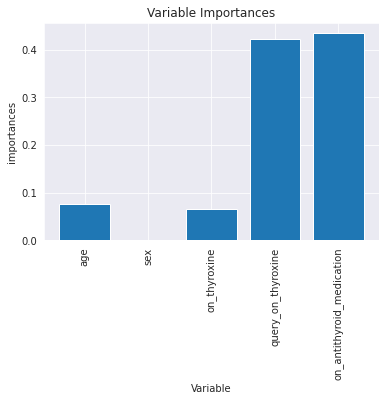

In [39]:
#List of x locations for plotting
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, n_features, rotation = 'vertical')
#Axis labels and title
plt.ylabel('importances'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Random forest using most important features

In [40]:
#Assigning our target variable
y = hypo_df['status']

#Assigning x to our test features
columns = ['FTI', 'TSH', 'TT4','age','on_antithyroid_medication', 'query_hypothyroid']
X =hypo_df[columns]
features =X.columns.to_list()

#Training 80% percent of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is:' ,{accuracy_score(y_test, y_pred)} )
print('\n')
print(f'{classification_report(y_test, y_pred)}')
#confusion_matrix(y_test, y_pred)

#Creating a dataframe to output predicted values
Prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Prediction_df.describe()

The accuracy score is: {0.9921011058451816}


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       610
           1       0.85      0.96      0.90        23

    accuracy                           0.99       633
   macro avg       0.92      0.97      0.95       633
weighted avg       0.99      0.99      0.99       633



,Actual,Predicted
count,633.000000,633.000000
mean,0.036335,0.041074
std,0.187270,0.198619
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Random Forest using important features:

Our model has a classification rate of 99% which is overfitted. 

In prediction case, when the random forest model predicts a hypothoroid patients, the prediction is true have 85% of the time.

The recall, the ability for the model to identify a patient with hypothoroid is 96% of the time

This not an improvement as much from random forest since it is overfitted and may lead to incorrect predictions.

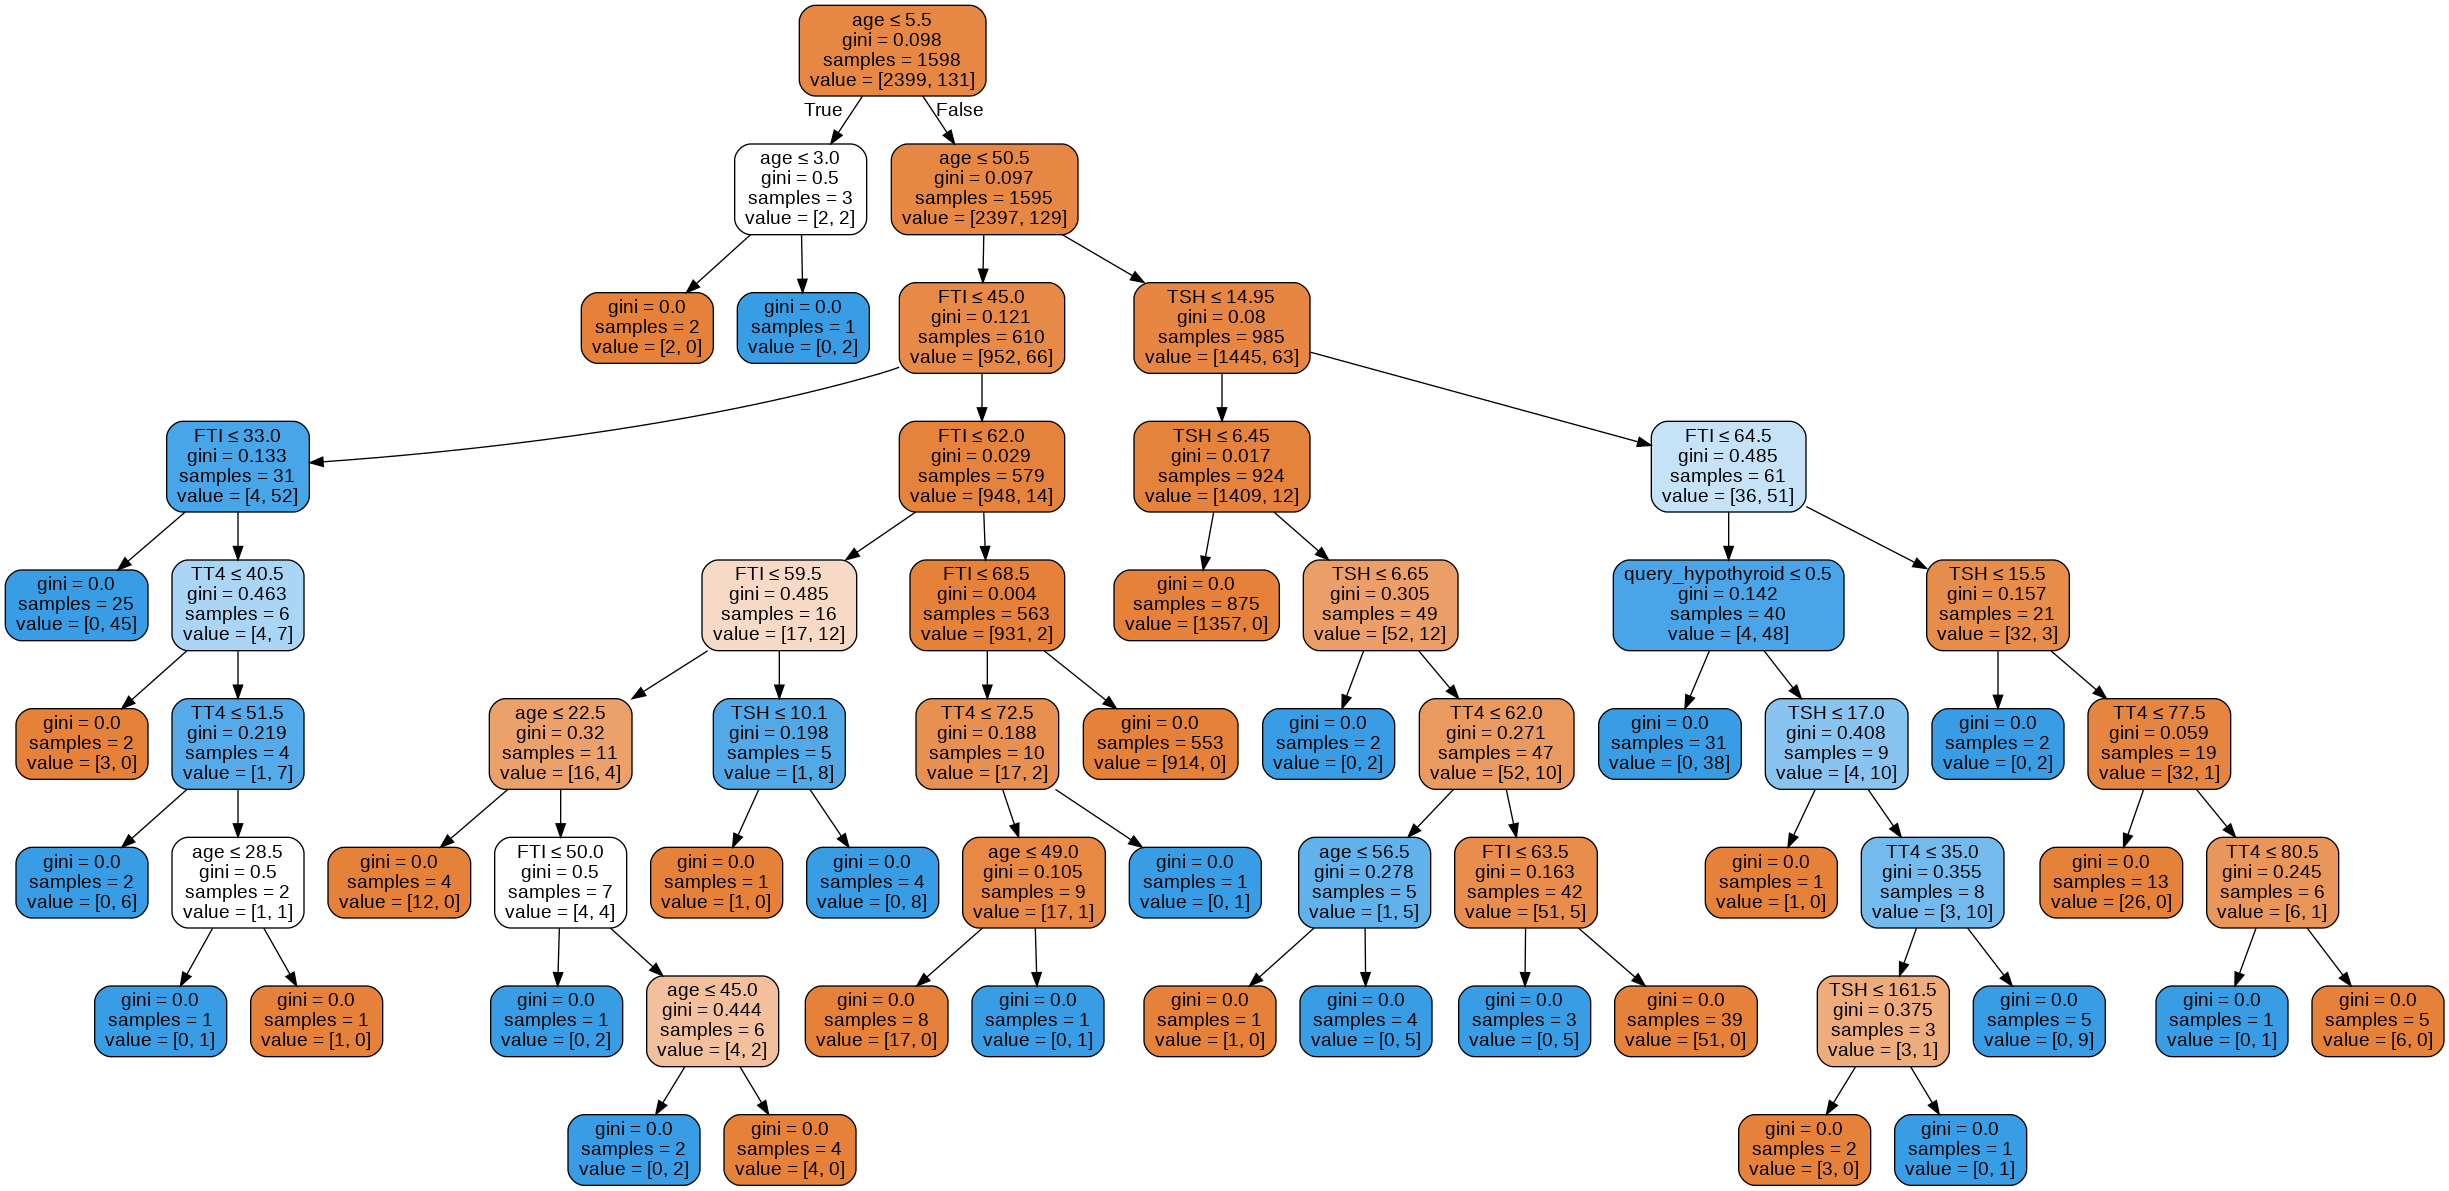

In [41]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
#Displaying one of the trees in the random forest
dot_data = StringIO()
#Picking a specific tree from the forest
tree = rf.estimators_[25]

export_graphviz(tree, out_file = dot_data,
                filled = True, rounded = True,
                special_characters = True, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('hypothoroid_feature_selection_forest.png')
Image(graph.create_png())

### Decision tree using adaboost and gradient boost

### Prediction with AdaBoost

In [42]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
#Scaling the data
X_scaled = preprocessing.scale(X_train)
X_scaled
# define the model
model = AdaBoostClassifier()
model.fit(X_scaled, y_train)


# Making predictions
#
y_pred = model.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is:' ,{accuracy_score(y_test, y_pred)} )
print('\n')
print(f'{classification_report(y_test, y_pred)}')
#confusion_matrix(y_test, y_pred)

#Creating a dataframe to output predicted values
Prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Prediction_df.describe()

The accuracy score is: {0.9636650868878357}


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       610
           1       0.50      0.04      0.08        23

    accuracy                           0.96       633
   macro avg       0.73      0.52      0.53       633
weighted avg       0.95      0.96      0.95       633



,Actual,Predicted
count,633.000000,633.000000
mean,0.036335,0.003160
std,0.187270,0.056165
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Decision Trees using adaboost:

Our model has a classification rate of 96% which is overfitted. 

In prediction case, when the decision tree model predicts a hypothoroid patients, the prediction is true have 50% of the time whereas the model can predict a patient does not have hypothoroid is true 97% of the time.

The recall, the ability for the model to identify a patient with hypothoroid is 4% of the time while can identify a patient without hypothoroid is 100% percent of the time

This is a slight improvement from random forest.

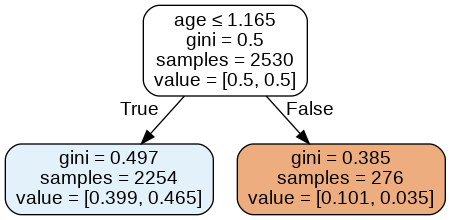

In [43]:
#Displaying the 25th stump
dot_data = StringIO()
#Picking a specific tree from the forest
ada = model.estimators_[25]

export_graphviz(ada, out_file = dot_data,
                filled = True, rounded = True,
                special_characters = True, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('hypothoroid_feature_selection_forest.png')
Image(graph.create_png())

###Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
target_number_of_trees = 300

# define the model
grad = GradientBoostingClassifier()
grad.fit(X_scaled, y_train)

# Making predictions
#
y_pred = grad.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is:' ,{accuracy_score(y_test, y_pred)} )
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

#Creating a dataframe to output predicted values
Prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Prediction_df.describe()



The accuracy score is: {0.9620853080568721}


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       610
           1       0.00      0.00      0.00        23

    accuracy                           0.96       633
   macro avg       0.48      0.50      0.49       633
weighted avg       0.93      0.96      0.95       633



,Actual,Predicted
count,633.000000,633.000000
mean,0.036335,0.001580
std,0.187270,0.039746
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Decision Trees using gradient boosting:

Our model has a classification rate of 96% which is overfitted. 

In prediction case, when the gradientboosting model predicts a hypothoroid patients, the prediction is true have 0% of the time whereas the model can predict a patient does not have hypothoroid is true 96% of the time.

The recall, the ability for the model to identify a patient with hypothoroid is 100% of the time while can identify a patient without hypothoroid is 0% percent of the time

This is a slight improvement from random forest.

## SVM

In [45]:
# Split the independent and dependent variables
# We want to predict if someone has hypothoroid, so let's use that column as our Y 
y = hypo_df['status']
#assing X for our test features
hypo = hypo_df.drop('status', axis=1)

from sklearn.decomposition import PCA
#Applying the reduction algorithm:PCA
pca = PCA(n_components=2).fit(hypo)
X = pca.transform(hypo)
X.shape

# Convert the data type for 'status' column from object to category
y = y.astype('category')

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
#Scaling the data
X_scaled = preprocessing.scale(X_train)
X_scaled
# Let's now build the svm model 
hypothoroid_model = SVC(kernel = 'linear')
# Train the model using the training set
hypothoroid_model.fit(X_scaled,y_train)
# Making predictions
#
y_pred = hypothoroid_model.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is:' ,{accuracy_score(y_test, y_pred)} )
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

#Creating a dataframe to output predicted values
Prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Prediction_df.describe()



The accuracy score is: {0.45023696682464454}


              precision    recall  f1-score   support

           0       1.00      0.43      0.60       607
           1       0.07      0.96      0.13        26

    accuracy                           0.45       633
   macro avg       0.53      0.69      0.36       633
weighted avg       0.96      0.45      0.58       633



,Predicted
count,633.000000
mean,0.587678
std,0.492642
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


SVM using linear kernel:

Our model has a classification rate of 45% which is not the best 

In prediction case, when the SVM model predicts a hypothoroid patients, the prediction is true have 7% of the time whereas the model can predict a patient does not have hypothoroid is true 100% of the time.

The recall, the ability for the model to identify a patient with hypothoroid is 96% of the time while can identify a patient without hypothoroid is 43% percent of the time



### Fitting the polynomial function

In [47]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3, gamma='auto')
#Scaling the data
X_scaled = preprocessing.scale(X_train)
X_scaled
# Training the model using the training set
polyclassifier.fit(X_scaled, y_train)
# Making predictions
#
y_pred_poly = polyclassifier.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is:' ,{accuracy_score(y_test, y_pred_poly)} )
print('\n')
print(f'{classification_report(y_test, y_pred_poly)}')
confusion_matrix(y_test, y_pred_poly)

#Creating a dataframe to output predicted values
Prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_poly})
Prediction_df.describe()

The accuracy score is: {0.43285939968404424}


              precision    recall  f1-score   support

           0       1.00      0.41      0.58       607
           1       0.07      0.96      0.12        26

    accuracy                           0.43       633
   macro avg       0.53      0.69      0.35       633
weighted avg       0.96      0.43      0.56       633



,Predicted
count,633.000000
mean,0.605055
std,0.489225
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


SVM using poly kernel:

Our model has a classification rate of 43% which is overfitted. 

In prediction case, when the SVM model predicts a hypothoroid patients, the prediction is true have 7% of the time whereas the model can predict a patient does not have hypothoroid is true 100% of the time.

The recall, the ability for the model to identify a patient with hypothoroid is 96% of the time while can identify a patient without hypothoroid is 41% percent of the time

This is a slight improvement from all random forest models.

### Fitting the model: Radial basis function (rbf)

In [48]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_scaled, y_train)
# Making predictions
#
y_pred_rbf = rbfclassifier.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is:' ,{accuracy_score(y_test, y_pred_rbf)} )
print('\n')
print(f'{classification_report(y_test, y_pred_rbf)}')
confusion_matrix(y_test, y_pred_rbf)

#Creating a dataframe to output predicted values
Prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})
Prediction_df.describe()

The accuracy score is: {0.9557661927330173}


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       607
           1       0.00      0.00      0.00        26

    accuracy                           0.96       633
   macro avg       0.48      0.50      0.49       633
weighted avg       0.92      0.96      0.94       633



,Predicted
count,633.000000
mean,0.003160
std,0.056165
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


SVM using rbf kernel:

Our model has a classification rate of 95% which is overfitted. 

In prediction case, when the SVM model predicts a hypothoroid patients, the prediction is true have 0% of the time whereas the model can predict a patient does not have hypothoroid is true 96% of the time.

The recall, the ability for the model to identify a patient with hypothoroid is 0% of the time while can identify a patient without hypothoroid is 100% percent of the time


### Fitting the model: Sigmoid function

In [49]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_scaled, y_train)

# Making predictions
#
y_pred_sig = sigclassifier.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is:' ,{accuracy_score(y_test, y_pred_sig)} )
print('\n')
print(f'{classification_report(y_test, y_pred_sig)}')
confusion_matrix(y_test, y_pred_sig)

#Creating a dataframe to output predicted values
Prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sig})
Prediction_df.describe()

The accuracy score is: {0.9415481832543444}


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       607
           1       0.00      0.00      0.00        26

    accuracy                           0.94       633
   macro avg       0.48      0.49      0.48       633
weighted avg       0.92      0.94      0.93       633



,Predicted
count,633.000000
mean,0.017378
std,0.130777
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


SVM using sigmoid kernel:

Our model has a classification rate of 94% which is overfitted. 

In prediction case, when the SVM model predicts a hypothoroid patients, the prediction is true have 0% of the time whereas the model can predict a patient does not have hypothoroid is true 96% of the time.

The recall, the ability for the model to identify a patient with hypothoroid is 0% of the time while can identify a patient without hypothoroid is 98%  of the time

letter to TM: I was not able to run the visual code for the visualization of the kernels since i have a small RAM which would crash each time that i ran the code

## Conclusion

* All the accuracy scores of our models are above 90%. this may show overfitting of some sorts
* The most appropriate model for our classification would be: Random forest classification

* The best performing kernel in SVM is radial basis function and sigmoid function since they had accuracy score of above 90%

### Challenging the findings
* The models would have performed better if hyperparameter tunning with the right paramaters were applied on the model
* The models also have had cross validation applied to see how stable the model is.